In [2]:
import numpy as np

# global variable
iris1 = []
iris2 = []
iris3 = []
#data = np.loadtxt('iris.txt')
#print(data)
# read file part
with open('./iris.txt') as f:
    for line in f:
        line = line.strip().replace('  ', ' ').split()
        iris_type = line[-1]
        if line[-1] == '1':
            iris1.append([ float(num) for num in line ])
        elif line[-1] == '2':
            iris2.append([ float(num) for num in line ])
        elif line[-1] == '3':
            iris3.append([ float(num) for num in line ])
        else:
            raise ValueError("Unknown label")
    iris1 = np.array(iris1)
    iris2 = np.array(iris2)
    iris3 = np.array(iris3)

    assert iris1.shape == (50, 5), "Shape (x: feature) does not as expected"
    assert iris2.shape == (50, 5), "Shape (x: feature) does not as expected"
    assert iris3.shape == (50, 5), "Shape (x: feature) does not as expected"


In [3]:
#LDA part

def LDA(feature_pos: np.ndarray,
        feature_neg: np.ndarray,
        test: np.ndarray,
        punish: float,
        poslabel: str,
        neglabel: str):
    
    k1 = feature_pos.shape[0]
    k2 = feature_neg.shape[0]
    
    m1 = np.mean(feature_pos, axis=0)
    m2 = np.mean(feature_neg, axis=0)
    #print(k1)
    #print(k2)

    P1 = k1/(k1+k2)
    P2 = k2/(k1+k2)
    
    # Calculate sigma 1 Matrix
    sigma1 = np.zeros((len(feature_pos[0]),len(feature_pos[0])))
    sigma2 = np.zeros((len(feature_neg[0]),len(feature_neg[0])))
    #print(sigma1)
    #print(sigma2)
    for i in range(0, k1):
        dev1 = feature_pos[i] - m1
        sigma1 += np.outer(dev1, dev1)
    for i in range(0, k2):
        dev2 = feature_neg[i] - m2 
        sigma2 += np.outer(dev2, dev2)
    # devided by (n-1) 

    sigma1 /= (k1 - 1)
    sigma2 /= (k2 - 1)
    Sigma = P1* sigma1 + P2* sigma2
    #print(sigma1)
   # print(Sigma)
    #np.linalg.inv(Sigma)
    #Calculate W_transpose(W.T = (m1-m2)*sigma^-1)
    W = np.dot((m1 - m2).T, np.linalg.inv(Sigma))

    # Calculate bias value
    b = np.dot(-0.5 *W,  (m1 + m2))- np.log((punish*P2)/P1)
    #Initial correct=0
    correct_count = 0

    predictions = []
    #Training starts
    for ix in range(0,test.shape[0]):
        x_new = test[ix,:-1]
        D = np.dot(W.T, x_new) + b
        if D > 0:
            predictions.append(float(poslabel))
        elif D < 0:
            predictions.append(float(neglabel))

    #predictions = np.array(predictions)
    #print(predictions)
    
    for k in range(0, len(test)):
        if predictions[k] == test[k][-1]:
            
            correct_count += 1
    # Calculate accuracy
    accuracy = correct_count / len(test)*100
    return W, b, accuracy, predictions
#Confusion matrix part:

# question 2 step1~3
test_data = np.concatenate((iris2[25:, 2:], iris3[25:, 2:]))


Weight1, bias1 ,accuracy1,pred1 = LDA(iris2[:25, 2:4],iris3[:25, 2:4],test_data, 1,'2','3')

print("The weight vector of model using 3rd and 4th feature, and first half training is: ")
print(np.round (Weight1.T, decimals = 2))
print("The bias is: {:.2f}".format(bias1))
#print(np.round (bias1, decimals = 2))
print("The accuracy is: {:.2f}%".format(accuracy1))
test_data = np.concatenate((iris2[:25, 2:], iris3[:25, 2:]))
#question 2 step4
Weight2, bias2 ,accuracy2,pred2 = LDA(iris2[25:, 2:4],iris3[25:, 2:4],test_data, 1,'2','3')
print("The weight vector of model using 3rd and 4th feature, and first half training is: ")
print(np.round (Weight2.T, decimals = 2))
print("The bias is: {:.2f}".format(bias2))
#print(np.round (bias2, decimals = 2))
print("The accuracy is: {:.2f}%".format(accuracy2))
#question 2 step5
avg_accuracy = 0.5*(accuracy1+accuracy2)
print("The 2-fold cross vaildation accuracy is: {:.2f}%".format(avg_accuracy))



The weight vector of model using 3rd and 4th feature, and first half training is: 
[ -2.09 -10.46]
The bias is: 28.10
The accuracy is: 94.00%
The weight vector of model using 3rd and 4th feature, and first half training is: 
[-3.73 -7.85]
The bias is: 31.08
The accuracy is: 94.00%
The 2-fold cross vaildation accuracy is: 94.00%


In [5]:
import matplotlib.pyplot as plt
def Confusion_mat(test_ans, preds, poslabel, neglabel):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    preds = np.array(preds)
    for ix in range(len(preds)):
        if preds[ix] == float(poslabel):
            if test_ans[ix] == float(preds[ix]):
                TP+= 1
            elif test_ans[ix] != float(preds[ix]):
                FP+= 1
        elif preds[ix] == float(neglabel):
            if test_ans[ix] == float(preds[ix]):
                TN+= 1
            elif test_ans[ix] != float(preds[ix]):
                FN+= 1
    TPR = TP / (TP + FN)
    FPR  = FP / (FP + TN)
    return TPR, FPR
#Define the TPR and FPR to plot figures in quesion 3

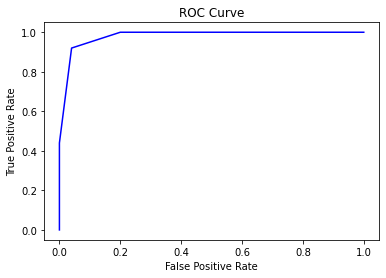

The AUC value using 4-features to train is: 
0.9808


In [6]:
#question 3 step 1
punish_weight = np.concatenate((1/np.arange(1,50000000,1000)[::-1], np.arange(1,50000000,1000)))
test_3_1 = np.concatenate((iris3[25:, :], iris2[25:, :]))
tprvalues1 = []
fprvalues1 = []
for P in punish_weight:    
    Weight3, bias3 ,accuracy3,pred3 = LDA(iris3[:25, :-1],iris2[:25, :-1],test_3_1, P,'3','2')
    tpr, fpr = Confusion_mat([ix[-1]for ix in test_3_1], pred3,'3','2')
    tprvalues1.append(tpr)
    fprvalues1.append(fpr)
plt.plot(fprvalues1, tprvalues1, color='blue')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("The AUC value using 4-features to train is: ")
print(np.trapz(tprvalues1[::-1],fprvalues1[::-1]))



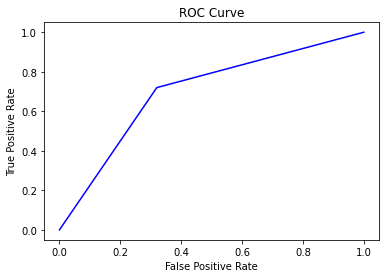

The AUC value using first 2 features to train is: 
0.7
The AUC value using last 2 features to train is: 
0.956


In [8]:
#question 3 step 2
temp3 = []
temp4 = []

for ix in range(int(0.5*len(iris3))):
    for j in range(0,2):
        temp3.append(iris3[ix, j])
    temp3.append(iris3[ix, -1])
temp3 = np.array(temp3)
for ix in range(int(0.5*len(iris2))):
    for j in range(0,2):
        temp4.append(iris2[ix, j])
    temp4.append(iris2[ix, -1])
temp4 = np.array(temp4)
test_3_2 = np.concatenate((temp3, temp4), axis=0)
test_3_2 = test_3_2.reshape(-1,3)

tprvalues2 = []
fprvalues2 = []
for P in punish_weight:    
    Weight3_2, bias3_2 ,accuracy3_2, pred3_2 = LDA(iris3[:25, 0:2],iris2[:25, 0:2],test_3_2, P,'3','2')
    tpr, fpr = Confusion_mat([ix[-1]for ix in test_3_2], pred3_2,'3','2')
    tprvalues2.append(tpr)
    fprvalues2.append(fpr)
plt.plot(fprvalues2, tprvalues2, color='blue')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print("The AUC value using first 2 features to train is: ")
print(np.trapz(tprvalues2[::-1],fprvalues2[::-1]))
#question 3 step 3
test_3 = np.concatenate((iris3[25:, 2:], iris2[25:, 2:]))
tprvalues = []
fprvalues = []
for P in punish_weight:    
    Weight3, bias3 ,accuracy3,pred3 = LDA(iris3[:25, 2:4],iris2[:25, 2:4],test_3, P,'3','2')
    tpr, fpr = Confusion_mat([ix[-1]for ix in test_3_1], pred3,'3','2')
    tprvalues.append(tpr)
    fprvalues.append(fpr)
'''plt.plot(fprvalues, tprvalues, color='blue')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
'''
print("The AUC value using last 2 features to train is: ")
print(np.trapz(tprvalues[::-1],fprvalues[::-1]))



In [125]:
#question 4 step 1
#Class 1 & 2
test_data4 = np.concatenate((iris1[25:, 2:], iris2[25:, 2:],iris3[25:, 2:]))
result = []
Weight4_1, bias4_1 ,accuracy4_1,pred4_1 = LDA(iris1[:25, 2:4],iris2[:25, 2:4],test_data4, 1,'1','2')
#Class 2 & 3
Weight4_2, bias4_2 ,accuracy4_2,pred4_2 = LDA(iris2[:25, 2:4],iris3[:25, 2:4],test_data4, 1,'2','3')
#Class 1 & 3
Weight4_3, bias4_3 ,accuracy4_3,pred4_3 = LDA(iris1[:25, 2:4],iris3[:25, 2:4],test_data4, 1,'1','3')
for i in range(len(test_data4)):
    result.append(int(pred4_1[i]))
    result.append(int(pred4_2[i]))
    result.append(int(pred4_3[i]))
result = np.array(result)
result = result.reshape(-1,3)


final_result = []
#print(result)
for i in range(0, len(result)):
    decision = {1: 0, 2: 0, 3: 0}
    decision[result[i][0]] += 1
    decision[result[i][1]] += 1
    decision[result[i][2]] += 1
    max_vote = max(decision.values())
    winners = [key for key, value in decision.items() if value == max_vote]
    if len(winners) == 1:
        final_result.append(int(winners[0]))
        #print(winners[0])
    else:
        # Handle tie cases here, e.g., consider it as an error
        final_result.append('Tied')
        print("Tied")
# Calculate the classification accuracy
correct_count = 0
for i in range(len(test_data4)) :
    if final_result[i] == int(test_data4[i,-1]):
        correct_count+=1
    elif final_result[i] == 'Tied':
            print("No. "+str(i)+" tied, there exist error")
else:
    pass
accuracy4_1 = (correct_count / len(test_data4)) * 100
print("The accuracy of qusation 4 step 1 is: {:.2f}%".format(accuracy4_1))

The accuracy of qusation 4 step 1 is: 96.00%


In [128]:
#question 4 step 2
#Class 1 & 2
test_data4_2 = np.concatenate((iris1[:25, 2:], iris2[:25, 2:],iris3[:25, 2:]))
result2 = []
Weight4_1, bias4_1 ,accuracy4_1,pred4_1 = LDA(iris1[25:, 2:4],iris2[25:, 2:4],test_data4_2, 1,'1','2')
#Class 2 & 3
Weight4_2, bias4_2 ,accuracy4_2,pred4_2 = LDA(iris2[25:, 2:4],iris3[25:, 2:4],test_data4_2, 1,'2','3')
#Class 1 & 3
Weight4_3, bias4_3 ,accuracy4_3,pred4_3 = LDA(iris1[25:, 2:4],iris3[25:, 2:4],test_data4_2, 1,'1','3')
for i in range(len(test_data4_2)):
    result2.append(int(pred4_1[i]))
    result2.append(int(pred4_2[i]))
    result2.append(int(pred4_3[i]))
result2 = np.array(result2)
result2 = result2.reshape(-1,3)
final_result2 = []
#print(result)
for i in range(0, len(result2)):
    decision = {1: 0, 2: 0, 3: 0}
    decision[result2[i][0]] += 1
    decision[result2[i][1]] += 1
    decision[result2[i][2]] += 1
    max_vote = max(decision.values())
    winners = [key for key, value in decision.items() if value == max_vote]
    if len(winners) == 1:
        final_result2.append(int(winners[0]))
        #print(winners[0])
    else:
        # Handle tie cases here, e.g., consider it as an error
        final_result2.append('Tied')
        print("Tied")
# Calculate the classification accuracy
correct_count = 0
for i in range(len(test_data4)) :
    if final_result[i] == int(test_data4[i,-1]):
        correct_count+=1
    elif final_result[i] == 'Tied':
            print("No. "+str(i)+" tied, there exist error")
else:
    pass
accuracy4_2 = (correct_count / len(test_data4)) * 100
avg = 0.5*accuracy4_1 + 0.5*accuracy4_2
print("The accuracy of qusation 4 step 2 is: {:.2f}%".format(accuracy4_2))

The accuracy of qusation 4 step 2 is: 96.00%


The AUC value using 4-features to train is: 
0.956


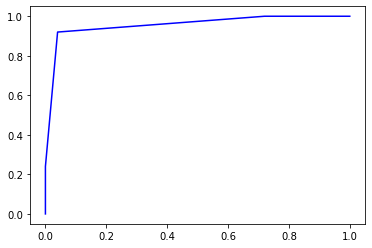